# Polynomial Regression

## Lab Assignment - Semiconductor Device I/V Prediction

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

Perform the following operations.

#### 1. Plot the voltage vs current. What degree of polynomial do you think is this?
#### 2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 
#### 3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it underfit, properly fit or overfit?
#### 4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 
#### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.
#### Perform KFold Cross validation with k=3 to 10 for degree 2, 3, 4. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('./datasets/diode_data.xlsx')
df.head()

,voltage,current
0,-1.25,-3.164730
1,-1.20,-2.346773
2,-1.15,-1.305936
3,-1.10,-1.891162
4,-1.05,-1.040983


#### 1. Plot the voltage vs current. What degree of polynomial do you think is this?

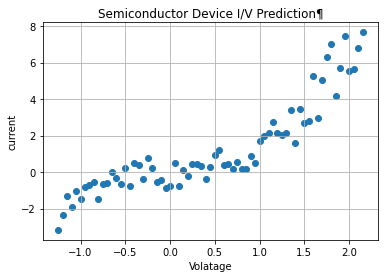

In [3]:
plt.scatter(df['voltage'],df['current'])

plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)

#### 2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 

In [20]:
from sklearn.model_selection import train_test_split

vol_train,vol_test,cur_train,cur_test= train_test_split(df['voltage'],df['current'],random_state=2,test_size=0.3)#train test train test


In [21]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=2)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

#### 3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it underfit, properly fit or overfit?

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])
#print(coef)

#print(model.predict(poly.fit_transform([[-1.25]])))
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

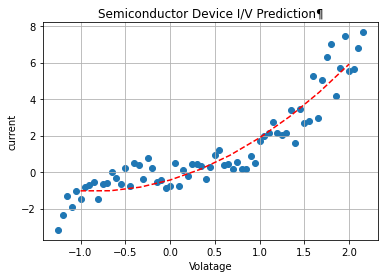

In [23]:
a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(df['voltage'],df['current'])

plt.show()

polynomial curve fits properly


#### 4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 

In [25]:
print(model.predict(poly.fit_transform(np.array(vol_test.tolist()).reshape(-1,1))))
print(type(vol_test))

[ 4.74555102 -0.9359233   1.88034374  1.27989167 -0.10815119 -0.56968386
 -0.01616036 -0.43306103  5.43483686  0.6261969  -0.90305905  1.7237727
 -1.0379609   0.18073734  4.52439977  4.30755387  3.68284824 -0.2792168
  6.66975353  6.16287082 -1.04384478]
<class 'pandas.core.series.Series'>


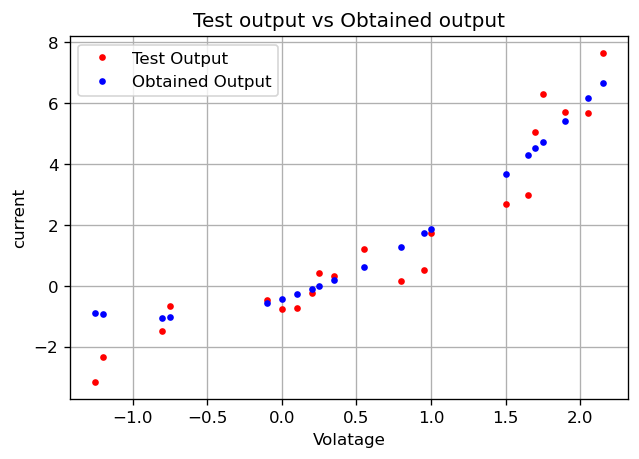

In [9]:
plt.figure(dpi=120)
plt.plot(vol_test,cur_test,'r.',label='Test Output')
plt.plot(vol_test,model.predict(poly.fit_transform(np.array(vol_test.tolist()).reshape(-1,1))),'b.',label='Obtained Output')
plt.title("Test output vs Obtained output")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.legend()
plt.grid(True)

In [24]:
from sklearn.metrics import mean_squared_error

x=model.predict(poly.fit_transform(np.array(vol_test.tolist()).reshape(-1,1)))
y=np.array(cur_test.tolist()).reshape(1,-1)

mse=mean_squared_error(cur_test,x,multioutput='uniform_average')
print("MSE: ",mse)
#print(cur_test)
#print(vol_test.tolist())




MSE:  0.8504991886032192


#### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.

### Degree 2

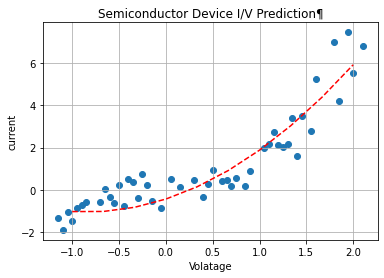

In [11]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=2)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degree 3

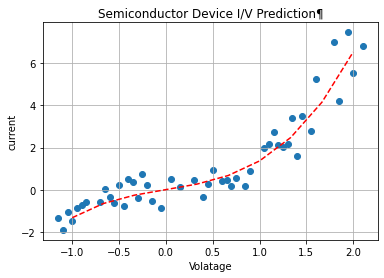

In [12]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=3)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degree 4

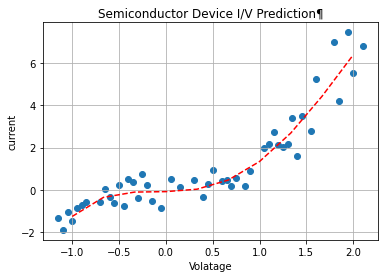

In [13]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=4)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degree 5

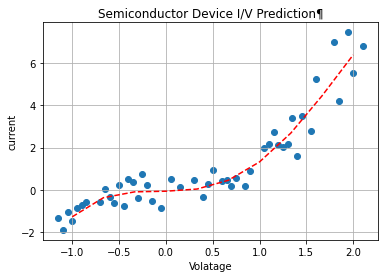

In [14]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=5)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degeree 6

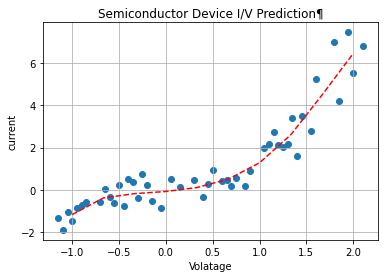

In [15]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=6)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degree 7

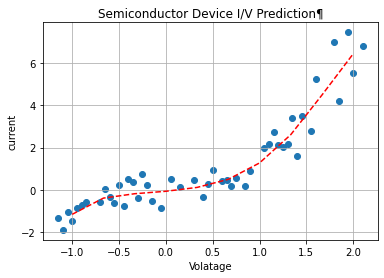

In [16]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=7)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degree 8

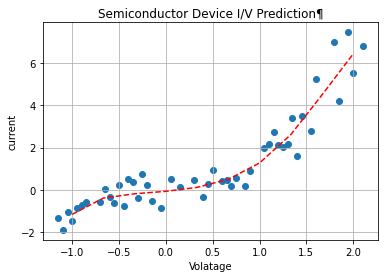

In [17]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=8)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degree 9

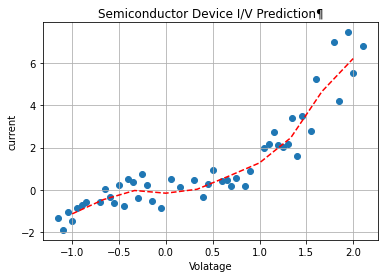

In [18]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=9)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



### Degree 10

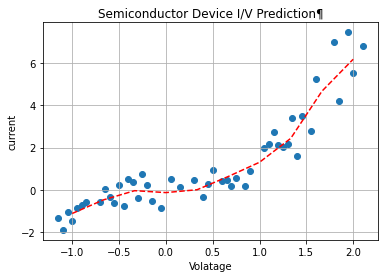

In [19]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=10)

voltage=np.array(df['voltage']).reshape(-1,1)
coef=poly.fit_transform(voltage)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,df['current'])

a=np.linspace(-1,2,10)

a_quad=poly.transform(a.reshape(-1,1))
plt.title("Semiconductor Device I/V Prediction¶")
plt.xlabel('Volatage')
plt.ylabel('current')
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(vol_train,cur_train)

plt.show()



From degree 9 the data start to overfit